# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth =5.3


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [29]:
import json
# Fetch current BTC price
btc_response = requests.get(url=btc_url)
btc_json = btc_response.json()
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]
print(f"BTC price: {btc_price}")

# Fetch current ETH price
eth_request = requests.get(url=eth_url)
eth_json = eth_request.json()
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]
print(f"ETH price: {eth_price}")

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value =  eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

BTC price: 23148.0
ETH price: 1600.97
The current value of your 5.3 ETH is $8485.14
The current value of your 1.2 BTC is $27777.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [30]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [31]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [48]:
# Format current date as ISO format
import datetime
time = pd.Timestamp("2023-01-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
tickers_df = api.get_bars(
    tickers,
    timeframe=timeframe,
    start=time,
    end=time
).df

tickers_df.head()
# Reorganize the DataFrame
# Separate ticker data
agg_close_price =tickers_df['close'].iloc[0]
spy_close_price = tickers_df['close'].iloc[1]


In [42]:

# Concatenate the ticker DataFrames

# Preview DataFrame
df.head()

SPY                                    \
                              open    high     low   close    volume   
timestamp                                                              
2023-01-26 05:00:00+00:00  403.130  404.92  400.03  404.75  72307597   
2023-01-27 05:00:00+00:00  403.655  408.16  403.44  405.68  68346180   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2023-01-26 05:00:00+00:00      521730  402.612043  100.33  100.46  100.07   
2023-01-27 05:00:00+00:00      496480  405.790293   99.96  100.14   99.91   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2023-01-26 05:00:00+00:00  100.23  5399100       27372  100.278729  
2023-01-27 05:00:00+00:00  100.08  5123098       18192  100.061411

In [49]:
# Pick AGG and SPY close prices

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.08
Current SPY closing price: $405.68


In [50]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20284.00
The current value of your 200 AGG shares is $20016.00


### Savings Health Analysis

In [62]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame(data=[crypto, shares], columns=['amount'], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,36262.741
shares,40300.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

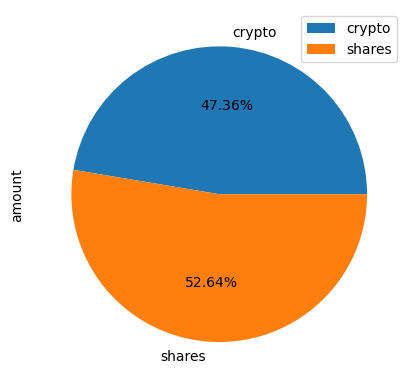

In [107]:
# Plot savings pie chart
labels = df_savings.index
amounts = df_savings.values

df_savings.plot(kind='pie', subplots=True, autopct='%1.2f%%')


In [108]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings =  crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! on reaching this financial goal.")
else:
    print(f"You { emergency_fund - total_savings} dollars away from reaching the goal.")    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [111]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [113]:
# Get 5 years' worth of historical data for SPY and AGG
tickers_df = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

tickers_df.head()
# Reorganize the DataFrame
AGG = tickers_df[tickers_df['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = tickers_df[tickers_df['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high      low    close   volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.700  1421843   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-05-01 04:00:00+00:00       11008  108.743679  238.68  239.1700  238.195   
2017-05-02 04:00:00+00:00        9263  108.831870  238.84  238.9800  238.300   
2017-05-03 04:00:00+00:00       10987  108.902870  238.29  238.8775  237.700   
2017-05-04 04:00:00+00:00        7501  108.629678  238.83  238.9225  237.780   
2017-05-05 04:00:00+00:00        7385  108.675918  239.19  239.7200  238.680   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-05-01 04:00:00+00:00  238.63  66882521      180740  238.682276  
2017-05-02 04:00:00+00:00  238.76  57375732      176648  238.630973  
2017-05-03 04:00:00+00:00  238.52  73137731      223568  238.418100  
2017-05-04 04:00:00+00:00  238.74  61462732      208872  238.541805  
2017-05-05 04:00:00+00:00  239.68  62001269      204885  239.253410

In [116]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

monte_carlo.portfolio_data.head()

AGG                                       \
                             open      high      low    close   volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.700  1421843   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-01 04:00:00+00:00       11008  108.743679          NaN  238.68   
2017-05-02 04:00:00+00:00        9263  108.831870     0.001426  238.84   
2017-05-03 04:00:00+00:00       10987  108.902870    -0.000827  238.29   
2017-05-04 04:00:00+00:00        7501  108.629678    -0.001057  238.83   
2017-05-05 04:00:00+00:00        7385  108.675918     0.000184  239.19   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-05-01 04:00:00+00:00  239.1700  238.195  238.63  66882521      180740   
2017-05-02 04:00:00+00:00  238.9800  238.300  238.76  57375732      176648   
2017-05-03 04:00:00+00:00  238.8775  237.700  238.52  73137731      223568   
2017-05-04 04:00:00+00:00  238.9225  237.780  238.74  61462732      208872   
2017-05-05 04:00:00+00:00  239.7200  238.680  239.68  62001269      204885   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-01 04:00:00+00:00  238.682276          NaN  
2017-05-02 04:00:00+00:00  238.630973     0.000545  
2017-05-03 04:00:00+00:00  238.418100    -0.001005  
2017-05-04 04:00:00+00:00  238.541805     0.000922  
2017-05-05 04:00:00+00:00  239.253410     0.003937

In [117]:
# Printing the simulation input data
monte_carlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/antonio/fintech/python-apis/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001741,1.000114,0.992939,0.998849,0.996653,0.998568,1.007779,0.998494,1.003126,0.993314,...,1.007499,0.997686,0.986663,0.993291,1.003270,1.013155,0.998747,1.007466,1.009047,0.999492
2,0.993472,1.004170,0.994553,0.994286,1.002579,1.004162,1.016555,1.003090,1.001209,0.976561,...,1.012862,1.000778,0.982552,0.983137,0.998462,1.015524,1.013497,1.018235,1.012238,1.007044
3,0.978721,1.010843,0.988784,0.994189,0.994751,1.001584,1.016588,0.999888,0.997887,0.981163,...,1.000831,0.999718,0.987118,0.987672,0.998654,1.024147,1.014318,1.006377,1.010739,1.003467
4,0.978570,1.015095,0.981897,0.993139,0.988607,0.983730,1.003257,1.008749,0.983082,0.990453,...,1.010364,0.998969,0.992142,0.996101,1.004266,1.028491,1.003340,0.991841,1.013028,0.990515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.553959,2.926109,10.970923,2.938846,6.823236,6.725670,24.409148,2.160659,2.454522,9.241242,...,15.156862,6.101937,5.814877,19.947953,7.544629,23.131376,11.024226,8.165063,15.742901,15.974917
7557,4.560403,2.911218,10.895075,2.952489,6.843854,6.809060,24.661954,2.140922,2.445343,9.292263,...,15.040118,6.088640,5.762373,19.799774,7.500651,23.240034,11.097307,8.139056,15.835404,16.051690
7558,4.612512,2.929347,10.859289,2.958637,6.824399,6.754586,24.460005,2.134574,2.443145,9.188993,...,15.047165,6.112838,5.654952,19.553800,7.532637,23.389485,11.173656,8.066031,15.793196,15.994674
7559,4.588186,2.910090,10.785325,2.962235,6.755848,6.741511,24.427068,2.113771,2.445354,9.215538,...,15.065723,6.200524,5.709604,19.499025,7.546346,23.216600,11.231869,7.989259,15.559684,15.957084


In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009035,1.019800,1.007274,0.993537,0.999989,1.006793,0.987234,0.991026,0.999287,0.989965,...,1.008802,0.990631,0.998367,0.996306,1.005638,0.999298,1.003740,0.995918,0.997987,0.987705
2,1.015749,1.016643,1.021442,0.987915,1.000572,1.007587,0.989688,0.995665,1.004104,0.985250,...,1.010723,0.982956,0.998577,0.981389,1.018035,1.000601,1.002730,0.980490,1.011566,0.984374
3,0.991994,1.011483,1.030600,0.997095,0.997604,1.005709,0.994743,0.997920,0.994627,0.997900,...,1.012315,0.989154,0.981850,0.971472,1.006515,1.002006,1.004207,0.984857,1.011721,0.987595
4,0.987360,1.008866,1.034499,1.000035,0.996255,1.003667,0.994341,0.979276,0.999065,0.996478,...,1.016074,0.968970,0.987125,0.972621,1.010508,1.005873,1.004374,0.987862,1.008460,1.000726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.161399,13.710953,7.014478,13.250531,17.253323,6.504709,17.273753,8.488013,10.957276,13.189109,...,8.223420,12.288181,12.515016,19.375254,10.173651,22.237832,29.862674,5.580458,13.105158,4.897044
7557,15.177512,13.738440,7.043751,13.102212,17.417942,6.477584,17.095762,8.496915,10.990621,12.939785,...,8.340971,12.323093,12.494097,19.483966,10.183564,22.458175,30.326832,5.621498,12.995128,4.964084
7558,15.330981,13.708830,7.038211,13.151718,17.470599,6.487290,16.977758,8.420851,10.888101,13.032973,...,8.363106,12.358473,12.505053,19.621043,10.328272,22.774489,30.055585,5.658289,13.078240,4.966424
7559,15.247704,13.672925,7.101012,13.252124,17.570481,6.403013,17.077302,8.521628,10.773828,12.927884,...,8.216022,12.349652,12.489294,19.596308,10.443810,22.852504,30.026844,5.669949,13.204933,4.931674


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

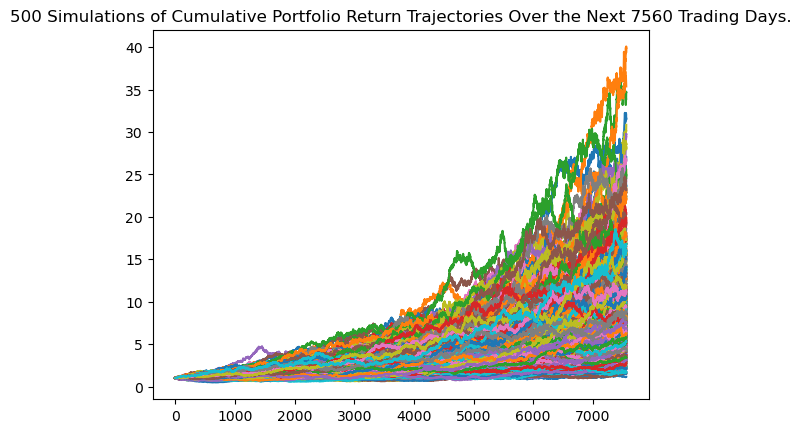

In [118]:
# Plot simulation outcomes
monte_carlo.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

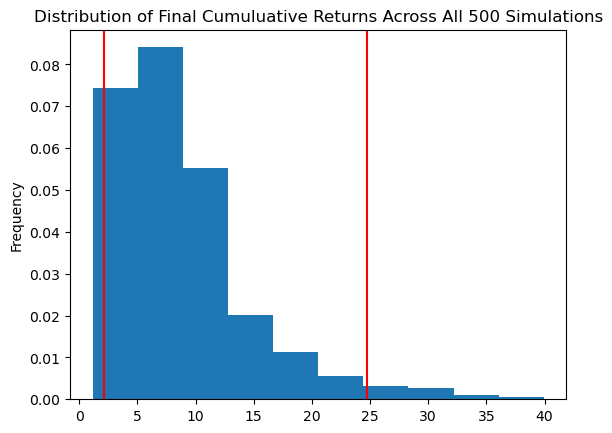

In [119]:
# Plot probability distribution and confidence intervals
monte_carlo.plot_distribution()

### Retirement Analysis

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = monte_carlo.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              8.777760
std               5.856754
min               1.160037
25%               4.733188
50%               7.385400
75%              10.885052
max              39.931048
95% CI Lower      2.132335
95% CI Upper     24.777773
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [121]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42646.71 and $495555.46


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [122]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $63970.06 and $743333.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [129]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_5 = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.70,.30],
    num_simulation=500,
    num_trading_days=252*5
)

monte_carlo_5.portfolio_data.head()


AGG                                       \
                             open      high      low    close   volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.700  1421843   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-01 04:00:00+00:00       11008  108.743679          NaN  238.68   
2017-05-02 04:00:00+00:00        9263  108.831870     0.001426  238.84   
2017-05-03 04:00:00+00:00       10987  108.902870    -0.000827  238.29   
2017-05-04 04:00:00+00:00        7501  108.629678    -0.001057  238.83   
2017-05-05 04:00:00+00:00        7385  108.675918     0.000184  239.19   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-05-01 04:00:00+00:00  239.1700  238.195  238.63  66882521      180740   
2017-05-02 04:00:00+00:00  238.9800  238.300  238.76  57375732      176648   
2017-05-03 04:00:00+00:00  238.8775  237.700  238.52  73137731      223568   
2017-05-04 04:00:00+00:00  238.9225  237.780  238.74  61462732      208872   
2017-05-05 04:00:00+00:00  239.7200  238.680  239.68  62001269      204885   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-01 04:00:00+00:00  238.682276          NaN  
2017-05-02 04:00:00+00:00  238.630973     0.000545  
2017-05-03 04:00:00+00:00  238.418100    -0.001005  
2017-05-04 04:00:00+00:00  238.541805     0.000922  
2017-05-05 04:00:00+00:00  239.253410     0.003937

In [130]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/antonio/fintech/python-apis/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991441,1.001808,0.996401,1.001262,1.000239,1.003373,0.991127,1.003386,0.998766,1.004008,...,1.002505,0.999119,1.008803,1.001575,1.004817,0.999406,0.997176,1.004022,1.009575,0.998034
2,0.990141,1.007446,0.994468,0.999775,1.000438,1.006944,0.999421,0.995301,1.000173,1.005415,...,0.997986,0.999894,1.016929,1.003159,1.006133,1.000825,0.997415,1.008706,1.013410,0.999008
3,0.988334,1.004970,0.988728,1.001727,1.000688,1.009943,1.002542,0.999635,0.999967,1.010748,...,0.998381,0.997874,1.023774,1.000722,1.000108,0.999996,0.997760,1.009465,1.018630,0.997166
4,0.992635,1.002481,0.989111,1.002970,1.004741,0.999812,1.002364,0.997228,0.998319,1.008218,...,0.992940,0.996494,1.024280,0.992878,0.994076,1.001454,1.003581,1.009901,1.018165,0.996975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.096144,1.083564,1.309869,1.078245,1.390103,1.163227,0.814352,1.391408,1.335965,1.731861,...,1.085232,1.071430,1.194654,1.189243,1.235359,0.991170,1.050498,1.209759,1.130772,1.262765
1257,1.094426,1.073833,1.299297,1.074906,1.385824,1.156975,0.813363,1.390862,1.333562,1.725509,...,1.085543,1.070609,1.189307,1.184264,1.238332,0.987237,1.046972,1.209894,1.131320,1.261229
1258,1.088345,1.077979,1.304113,1.078085,1.373423,1.161917,0.816570,1.391887,1.336961,1.718380,...,1.085655,1.069214,1.181724,1.181211,1.241799,0.985766,1.051411,1.203456,1.129024,1.266219
1259,1.086766,1.075520,1.310560,1.074511,1.376815,1.157491,0.818335,1.398031,1.350882,1.714456,...,1.086693,1.066942,1.183793,1.175728,1.246491,0.985275,1.047278,1.199370,1.121983,1.258879


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

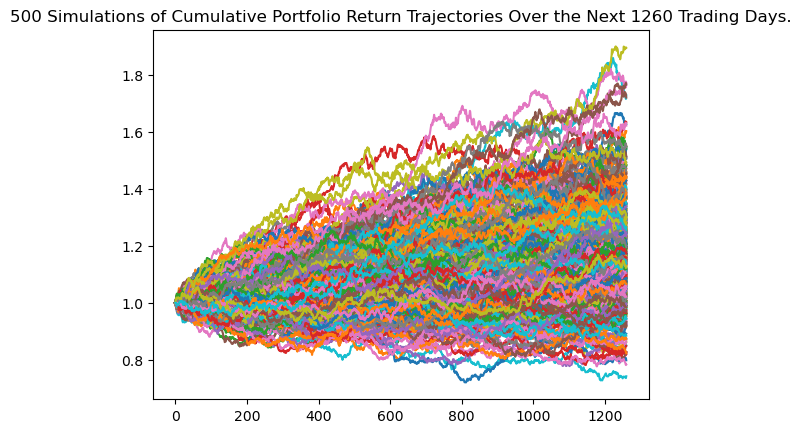

In [131]:
# Plot simulation outcomes
monte_carlo_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

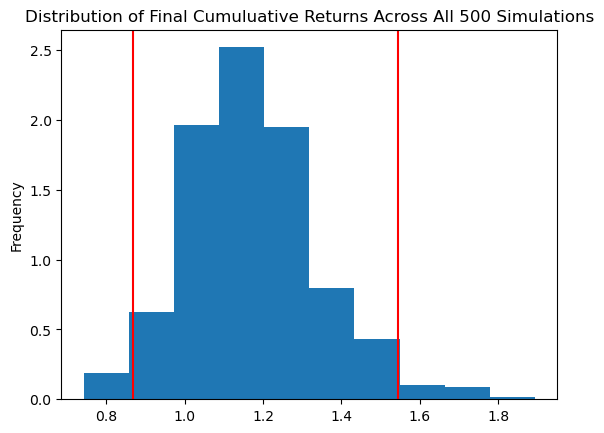

In [133]:
# Plot probability distribution and confidence intervals
monte_carlo_5.plot_distribution()

In [134]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = monte_carlo_5.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              1.174122
std               0.170364
min               0.742822
25%               1.066088
50%               1.159969
75%               1.272759
max               1.893548
95% CI Lower      0.867844
95% CI Upper      1.544680
Name: 1260, dtype: float64


In [135]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary[8]* initial_investment, 2)
ci_upper_five = round(summary[9]* initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52070.61 and $92680.82


### Ten Years Retirement Option

In [136]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_10 = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.60, .40],
    num_simulation=500,
    num_trading_days=252*10
)

monte_carlo_10.portfolio_data.head()



AGG                                       \
                             open      high      low    close   volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.700  1421843   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-01 04:00:00+00:00       11008  108.743679          NaN  238.68   
2017-05-02 04:00:00+00:00        9263  108.831870     0.001426  238.84   
2017-05-03 04:00:00+00:00       10987  108.902870    -0.000827  238.29   
2017-05-04 04:00:00+00:00        7501  108.629678    -0.001057  238.83   
2017-05-05 04:00:00+00:00        7385  108.675918     0.000184  239.19   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-05-01 04:00:00+00:00  239.1700  238.195  238.63  66882521      180740   
2017-05-02 04:00:00+00:00  238.9800  238.300  238.76  57375732      176648   
2017-05-03 04:00:00+00:00  238.8775  237.700  238.52  73137731      223568   
2017-05-04 04:00:00+00:00  238.9225  237.780  238.74  61462732      208872   
2017-05-05 04:00:00+00:00  239.7200  238.680  239.68  62001269      204885   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-01 04:00:00+00:00  238.682276          NaN  
2017-05-02 04:00:00+00:00  238.630973     0.000545  
2017-05-03 04:00:00+00:00  238.418100    -0.001005  
2017-05-04 04:00:00+00:00  238.541805     0.000922  
2017-05-05 04:00:00+00:00  239.253410     0.003937

In [137]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/antonio/fintech/python-apis/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996036,1.005564,1.002815,0.998233,1.000654,0.998421,1.005828,1.002205,0.995406,1.001116,...,0.996639,0.999854,1.004292,0.998404,0.990455,0.997914,1.002117,0.992136,0.998808,1.001781
2,0.989444,1.003055,0.998007,0.999661,0.995815,0.998723,1.005166,0.991976,0.993456,0.999743,...,0.997109,1.000534,1.006831,0.995967,1.001429,0.996056,0.992821,0.997865,1.004586,1.004279
3,0.987030,1.006809,0.992401,1.007158,0.991092,0.995926,0.999974,0.990693,0.995800,0.995554,...,0.994581,1.002691,1.008585,0.991026,1.001334,0.990243,0.995721,1.002345,1.000021,1.007458
4,0.985372,1.012062,0.992400,1.013534,0.995858,0.998109,1.002091,0.997512,0.995225,0.994384,...,0.992940,0.997649,0.996982,0.991555,1.005524,0.984550,0.992583,0.991106,0.999351,1.015792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.799997,1.141188,1.211639,1.467911,1.928514,1.230254,1.318943,2.143696,1.142363,0.902856,...,1.781122,1.301835,1.611304,1.718315,2.054200,2.225472,1.354416,1.833807,1.879190,1.569709
2517,1.792906,1.144931,1.207426,1.464490,1.937746,1.225474,1.322065,2.168974,1.149541,0.902145,...,1.759601,1.309832,1.610839,1.712232,2.073722,2.224897,1.357793,1.842280,1.900513,1.572207
2518,1.794935,1.141239,1.197750,1.455730,1.939188,1.218217,1.311794,2.164736,1.158122,0.895198,...,1.771885,1.319656,1.602156,1.718133,2.091606,2.221263,1.361028,1.847467,1.902778,1.575425
2519,1.792746,1.137012,1.203061,1.460106,1.936946,1.219166,1.314112,2.162495,1.168242,0.898552,...,1.773969,1.318286,1.601301,1.715340,2.075410,2.237015,1.375932,1.862397,1.902376,1.584471


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

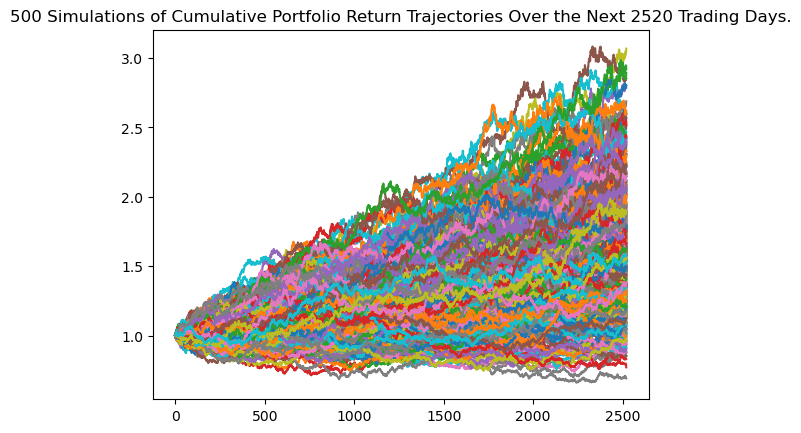

In [138]:
# Plot simulation outcomes
monte_carlo_10.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

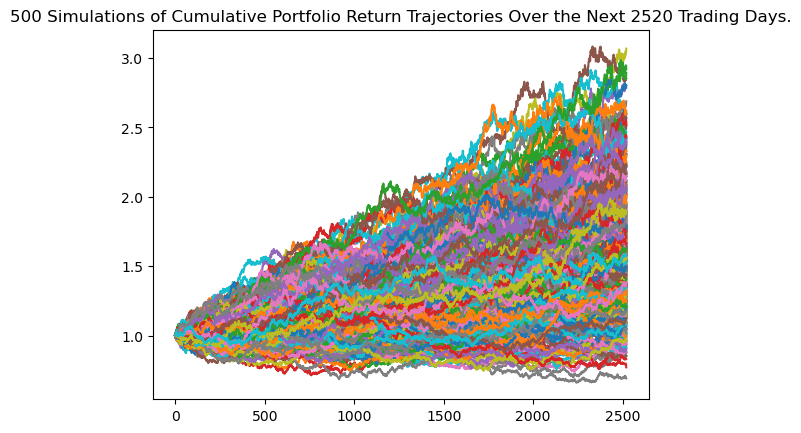

In [139]:
# Plot probability distribution and confidence intervals
monte_carlo_10.plot_simulation()

In [140]:
# Fetch summary statistics from the Monte Carlo simulation results
monte_carlo_10 = monte_carlo_10.summarize_cumulative_return()

# Print summary statistics
print(monte_carlo_10)

count           500.000000
mean              1.584077
std               0.419736
min               0.691041
25%               1.274783
50%               1.532780
75%               1.837152
max               3.068119
95% CI Lower      0.926389
95% CI Upper      2.541482
Name: 2520, dtype: float64


In [141]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary[8] * initial_investment, 2)
ci_upper_ten = round(summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $52070.61 and $92680.82
